## Movie_Pro_4_HK

* Student name: Hera K.
* Student pace: full time
* Scheduled project review date/time: 05/05/2023
* Instructor name: Daniel Burdeno
* Blog post URL:


# Overview

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

# Business Problem

# Data 

- How do you determine which users or items are similar to one another?
- Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
- How do you measure the accuracy of the ratings you calculate?

TASK : Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies

In [2]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 
import datetime


# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from scipy import stats
%matplotlib inline

# Modeling
#import libraries specific to recommendation system
from surprise import KNNWithMeans
from sklearn.neighbors import KNeighborsClassifier
from surprise import BaselineOnly, Dataset, Reader
from surprise import SVD
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from random import gauss as gs, uniform as uni, seed
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_link = pd.read_csv('./ml-latest-small/links.csv')
df_link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
# Movies, title, genres 

df_mov= pd.read_csv('./ml-latest-small/movies.csv')
df_mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
# Ratings

df_rat= pd.read_csv('./ml-latest-small/ratings.csv')
df_rat

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
# Tags

df_tag= pd.read_csv('./ml-latest-small/tags.csv')
df_tag

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
# Information (null info, columns name) about the all files 

print(df_link.info())
print(df_mov.info())
print(df_rat.info())
print(df_tag.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 no

In [8]:
# Check dupliacted columns for all dataframes

print("df_link['movieId'] dupliacted columns number : {}".format(df_link['movieId'].duplicated().sum()))
print("df_mov ['movieId'] dupliacted columns number : {}".format(df_mov['movieId'].duplicated().sum()))
print("df_rat ['movieId'] dupliacted columns number : {}".format(df_rat['movieId'].duplicated().sum()))
print("df_tag ['movieId'] dupliacted columns number : {}".format(df_tag['movieId'].duplicated().sum()))
print("df_tag ['userId']  dupliacted columns number : {}".format(df_tag['userId'].duplicated().sum()))

df_link['movieId'] dupliacted columns number : 0
df_mov ['movieId'] dupliacted columns number : 0
df_rat ['movieId'] dupliacted columns number : 91112
df_tag ['movieId'] dupliacted columns number : 2111
df_tag ['userId']  dupliacted columns number : 3625


### NOTE:
- **df_tag file will not be used for this analysis, there are too much duplicated 'userId' columns, there is such less information on this column.**
- **It will not worth to use it.**

In [9]:
print("df_link['movieId'] number of unique : {}".format(df_link['movieId'].nunique()))
print("df_mov ['movieId'] number of unique : {}".format(df_mov['movieId'].nunique()))
print("df_rat ['movieId'] number of unique : {}".format(df_rat['movieId'].nunique()))
print("df_tag ['movieId'] number of unique : {}".format(df_tag['movieId'].nunique()))
print("df_tag ['userId']  number of unique : {}".format(df_tag['userId'].nunique()))


df_link['movieId'] number of unique : 9742
df_mov ['movieId'] number of unique : 9742
df_rat ['movieId'] number of unique : 9724
df_tag ['movieId'] number of unique : 1572
df_tag ['userId']  number of unique : 58


In [10]:
print("df_link columns : {}".format(df_link.columns))
print("df_mov columns : {}".format(df_mov.columns))
print("df_rat columns : {}".format(df_rat.columns))

df_link columns : Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
df_mov columns : Index(['movieId', 'title', 'genres'], dtype='object')
df_rat columns : Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


- ### Merged df_link and df_mov columns

In [11]:
# Merged df_link and df_mov

df_1 = pd.merge(df_link,
              df_mov[['movieId', 'title', 'genres']],
              on=['movieId'])
df_1

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


- ### Merged df_1 and df_rat columns and Created the last df_2 dataframe

In [12]:
df_2 = pd.merge(df_1,
              df_rat[['movieId', 'userId', 'rating', 'timestamp']],
              on=['movieId'])
df_2

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


- ###  Check for missing values, how many nulls we have in our merged dataframe
- ###  Check for any duplicated columns
- ###  Drop the missing info from the dataframe

In [13]:
# Check duplicated columns and drop in the merged dataframe df_2

print(df_2['movieId'].duplicated().sum())
df_3 = df_2.drop_duplicates(subset=['movieId'])
print(df_3.head(2))
print(df_3.shape)

91112
     movieId  imdbId  tmdbId             title  \
0          1  114709   862.0  Toy Story (1995)   
215        2  113497  8844.0    Jumanji (1995)   

                                          genres  userId  rating  timestamp  
0    Adventure|Animation|Children|Comedy|Fantasy       1     4.0  964982703  
215                   Adventure|Children|Fantasy       6     4.0  845553522  
(9724, 8)


In [14]:
# Checked how many null info among the columns in the merged dataframe df_2

df_3.isnull().sum()

movieId      0
imdbId       0
tmdbId       8
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [15]:
# Removed null info, missing info and called forst five columns in the merged dataframe df_2

df_3 = df_2.dropna(subset=['tmdbId'])
df_3

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100834,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [16]:
# Info all columns in the merged dataframe df_2

df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


- ### Drop and Clean the unrelated columns 


In [17]:

df_cln = df_3.drop(columns= ['imdbId', 'tmdbId'], axis=1)
df_cln.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962


In [18]:
# Information for cleaned dataframe

df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   userId     100823 non-null  int64  
 4   rating     100823 non-null  float64
 5   timestamp  100823 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [19]:
df_cln.shape

(100823, 6)

- # Data Visualization

df_cln['movieId'] number of unique : 9716
df_cln ['title'] number of unique : 9713
df_cln ['genres'] number of unique : 951
df_cln ['userId'] number of unique : 610
df_cln ['rating']  number of unique : 10
df_cln ['timestamp']  number of unique : 85033


<AxesSubplot:>

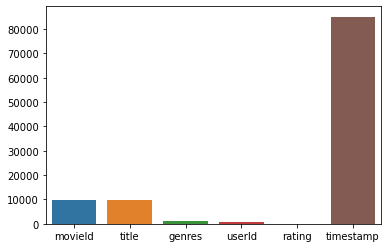

In [20]:
# Check the number of unique values in all columns to determine feature type

print("df_cln['movieId'] number of unique : {}".format(df_cln['movieId'].nunique()))
print("df_cln ['title'] number of unique : {}".format(df_cln['title'].nunique()))
print("df_cln ['genres'] number of unique : {}".format(df_cln['genres'].nunique()))
print("df_cln ['userId'] number of unique : {}".format(df_cln['userId'].nunique()))
print("df_cln ['rating']  number of unique : {}".format(df_cln['rating'].nunique()))
print("df_cln ['timestamp']  number of unique : {}".format(df_cln['timestamp'].nunique()))

# Plot the unique count for each column 
sns.barplot(x=df_cln.columns, y = df_cln.nunique(axis=0))

- ###  Review the below questions to recommend movie


- Find the movies with most reviews?
- Find the users that provide most reviews?
- How does the distribution looks like for ratings?

TASK :  Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies

- ### Top 30 Movies with most review & Top 30 Users with most reviews

<AxesSubplot:>

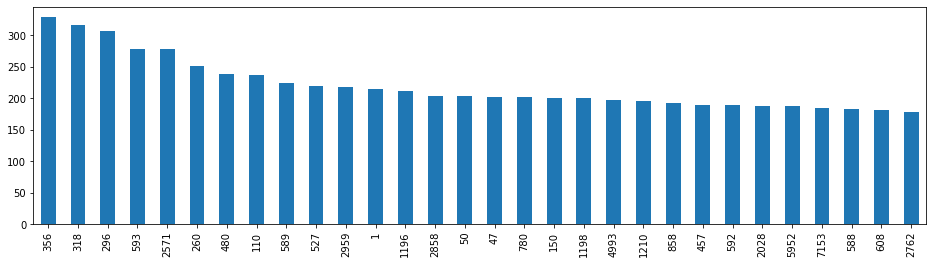

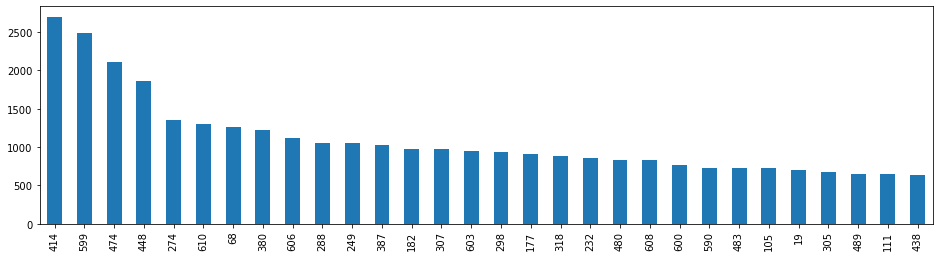

In [21]:

# Top 30 movies with most reviews
plt.figure(1, figsize = (16,4))
df_cln['movieId'].value_counts()[:30].plot(kind = 'bar')

# Top 30 users that provide most reviews
plt.figure(2, figsize = (16,4))
df_cln['userId'].value_counts()[:30].plot(kind = 'bar') 


- ### Movie Rating Score Distribution / Rating Frequency

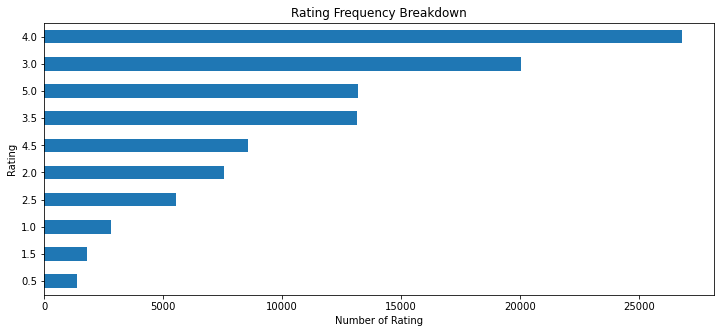

In [22]:
# Rating frequency

ax = df_cln['rating'].value_counts().plot.barh(figsize=(12,5))
ax.invert_yaxis()

ax.set_ylabel('Rating')
ax.set_xlabel('Number of Rating')
ax.set_title('Rating Frequency Breakdown')

plt.savefig('../phase4-project/ratingfreg.png', bbox_inches='tight', dpi=300)

plt.show()


- ### Grouping the userId & movieId

<AxesSubplot:>

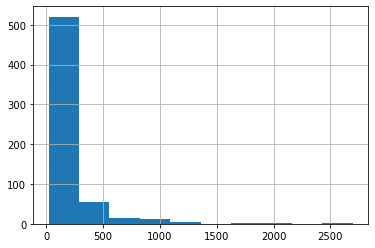

In [23]:
# Ratings frequency by aggregating the userId and movieId
# The  below histogram shows that most users (approx 560 out of 610 –90%) have appox 250 ratings.

rat_user = df_cln.groupby('userId')['movieId'].count()
plt.savefig('../phase4-project/mostuserrating.png', bbox_inches='tight', dpi=300)
rat_user.hist()

<AxesSubplot:>

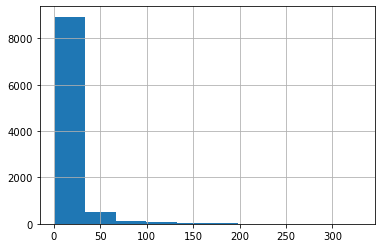

In [31]:
# Frequency of users who rate the movies 

rat_movie = df_cln.groupby('movieId')['userId'].count() 
plt.savefig('../phase4-project/mostuserrating.png', bbox_inches='tight', dpi=300)
rat_movie.hist()

- # Modeling Collaborative Filtering System

  Collaborative filtering system predicts based on what other similar users also rates data (movie / musics etc)

- ### Import the libraries for Modelling 

In [33]:
# Modeling
#import libraries specific to recommendation system

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from random import gauss as gs, uniform as uni, seed
from surprise import Dataset, Reader, accuracy
from surprise import KNNBaseline, KNNWithMeans
from surprise import BaselineOnly
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [34]:
# n_samples = 100 as default , here userId = 610

X, y = make_blobs(n_samples = 20000, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

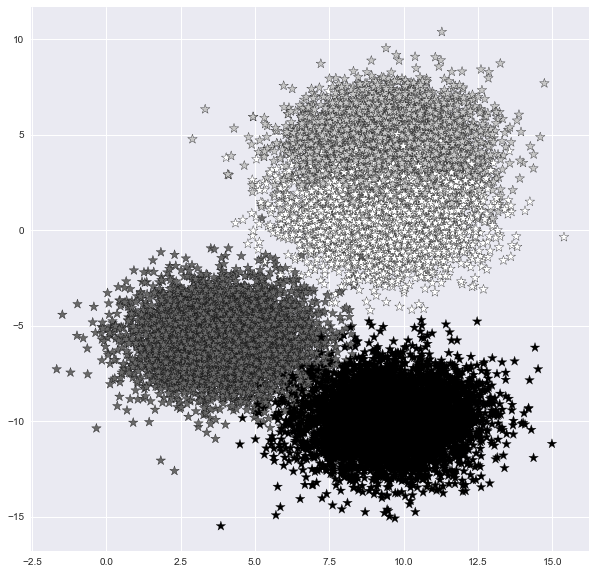

In [35]:
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()

- ### Train the Model on the Data Split

In [36]:
reader = Reader(rating_scale = (0,5))
df_rating = Dataset.load_from_df(df_cln[['userId','movieId','rating']], reader)

In [37]:
# Traintest split for the recommendation models
train_set, test_set = train_test_split(df_rating, test_size=0.2, random_state=42)

- ### Baseline Model
  Simple Baseline Model 

In [39]:
# Instantiate and fit model
model_baseline = BaselineOnly()
model_baseline.fit(train_set)

# Return test predictions for model fitted on trainset
pred = model_baseline.test(test_set)

# Save RMSE score to variable
base_normal = accuracy.rmse(pred)

Estimating biases using als...
RMSE: 0.8755


- ### KNN Baseline Model

In [69]:
# Instantiate and fit model
model_knn_base= KNNBaseline()
algo = KNNBaseline(k=60, min_k=2, sim_options={'name': 'msd', 'user_based': True})
algo.fit(train_set)

pred = algo.test(test_set)
print(pred[0])
knn_base = accuracy.rmse(pred)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
user: 432        item: 5617       r_ui = 3.00   est = 3.94   {'actual_k': 18, 'was_impossible': False}
RMSE: 0.8748


In [44]:
print(algo.predict('13', '194'))
print(algo.predict('260', '338'))
print(algo.predict('924', '559'))

user: 13         item: 194        r_ui = None   est = 3.50   {'was_impossible': False}
user: 260        item: 338        r_ui = None   est = 3.50   {'was_impossible': False}
user: 924        item: 559        r_ui = None   est = 3.50   {'was_impossible': False}


In [68]:
cross_v = cross_validate(algo, df_rating, measures=['RMSE', 'mae'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8772  0.8633  0.8586  0.8740  0.8742  0.8658  0.8752  0.8704  0.8615  0.8570  0.8677  0.0070  
MAE (testset)     0.6709  0.6651  0.6600  0.6705  0.6677  0.6669  0.6705  0.6707  0.6585  0.6595  0.6660  0.0047  
Fit time          4.38    4.09    4.16    4.18    4.15    4.18    4.15    4.25    4.22    4.21    4.20    0.08    
Test time         0.04    0.11    0.04    0.04    0.04    0.04    0.04    0.04    0.11    0.04    0.05    0.03    


- ### KNNWithMeans Model

In [77]:
# KNN
similarity = {
    "name": "cosine",
    "user_based": True,  # item-based similarity
}
algo_KNN = KNNWithMeans(sim_options = similarity)


- ## SVD Model 

In [71]:
# df_rating = df_cln[['userId','movieId','rating']]
data = df_rating

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
svd = accuracy.rmse(pred)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8783  0.8777  0.8748  0.8699  0.8622  0.8726  0.0060  
MAE (testset)     0.6764  0.6725  0.6726  0.6700  0.6635  0.6710  0.0043  
Fit time          3.76    3.76    3.86    3.75    3.76    3.78    0.04    
Test time         0.15    0.08    0.08    0.08    0.08    0.09    0.03    
RMSE: 0.8748


- ### Cross Validation Evaluation algo_KNN & algo_SVD

In [52]:
cross_validate_KNN = cross_validate(algo_KNN, df_rating, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate_SVD = cross_validate(algo_SVD, df_rating, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9067  0.8970  0.9176  0.9055  0.9009  0.9056  0.0070  
MAE (testset)     0.6930  0.6881  0.6955  0.6930  0.6883  0.6916  0.0029  
Fit time          11.10   10.97   11.16   11.01   11.20   11.09   0.09    
Test time         4.62    4.51    4.40    4.73    4.48    4.55    0.11    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8791  0.8749  0.8719  0.8747  0.8

- ### Train-Test Split Evaluation

In [54]:
# define train test function
def train_test_algo(algo, label):
    train_set, test_set = train_test_split(df_rating, test_size = 0.2)
    algo.fit(train_set)
    test_output = algo.test(test_set)
    test_df = pd.DataFrame(test_output)
    
    print("RMSE -",label, accuracy.rmse(test_output, verbose = False))
    print("MAE -", label, accuracy.mae(test_output, verbose=False))
    print("MSE -", label, accuracy.mse(test_output, verbose=False))
    
    return test_df

In [55]:
train_test_KNN = train_test_algo(algo_KNN, "algo_KNN")

print(train_test_KNN.head())

train_test_SVD = train_test_algo(algo_SVD, "algo_SVD")

print(train_test_SVD.head())

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE - algo_KNN 0.9043216646984428
MAE - algo_KNN 0.6953583869354445
MSE - algo_KNN 0.8177976732429627
   uid     iid  r_ui       est                                    details
0  427    5266   3.5  2.886033  {'actual_k': 40, 'was_impossible': False}
1  198    1617   4.0  3.856490  {'actual_k': 40, 'was_impossible': False}
2  111    5564   3.5  0.396599  {'actual_k': 40, 'was_impossible': False}
3  586  111781   4.5  4.268408  {'actual_k': 40, 'was_impossible': False}
4   41    2712   5.0  2.923114  {'actual_k': 40, 'was_impossible': False}
RMSE - algo_SVD 0.8743649452554733
MAE - algo_SVD 0.671622015324834
MSE - algo_SVD 0.7645140574916067
   uid    iid  r_ui       est                    details
0  321    344   3.0  3.304708  {'was_impossible': False}
1  325   1253   4.0  4.039976  {'was_impossible': False}
2  491   5218   4.5  4.200652  {'was_impossible': False}
3  122  95088   4.0  4.394088  {'was_impossible

In [56]:
df_cln['movieId'] = df_cln['movieId'].apply(lambda x: str(x)[2:].lstrip("0"))

In [57]:
def prediction(algo, users_K):
    pred_list = []
    for userId in range(1,users_K):
        for movieId in range(1,9716):
            rating = algo.predict(userId, movieId).est
            pred_list.append([userId, movieId, rating])
    pred_df = pd.DataFrame(pred_list, columns = ['userId', 'movieId', 'rating'])
    return pred_df

In [58]:
def top_recommendations(pred_df, top_N):
    sorted_df = df_cln.groupby(('userId'), as_index = False).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop=True)
    top_recom_movies = sorted_df.groupby('userId').head(top_N)
    return sorted_df, top_recom_movies

- ### Top Recommended Movies for KNN Model

In [59]:
# KNN predictions
pred_KNN = prediction(algo_KNN, 10)
recom_movies_KNN, top_recom_movies_KNN = top_recommendations(pred_KNN, 3)

In [60]:
top_recom_movies_KNN

,movieId,title,genres,userId,rating,timestamp
0,60,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,1,5.0,964984002
1,72,Excalibur (1981),Adventure|Fantasy,1,5.0,964981680
2,91,Indiana Jones and the Last Crusade (1989),Action|Adventure,1,5.0,964981909
232,1724,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,2,5.0,1445714851
233,2882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,2,5.0,1445715272
...,...,...,...,...,...,...
99485,1,Heaven's Prisoners (1996),Crime|Thriller,609,4.0,847221025
99486,,Dances with Wolves (1990),Adventure|Drama|Western,609,4.0,847220802
99521,,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,610,5.0,1479542900
99522,669,In Bruges (2008),Comedy|Crime|Drama|Thriller,610,5.0,1493845166


- ### Top Recommended Movies for SVD Model

In [61]:

## SVD predictions
pred_SVD = prediction(algo_SVD, 10)
recom_movies_SVD, top_recom_movies_SVD = top_recommendations(pred_SVD, 3)

In [62]:
top_recom_movies_SVD 

,movieId,title,genres,userId,rating,timestamp
0,60,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,1,5.0,964984002
1,72,Excalibur (1981),Adventure|Fantasy,1,5.0,964981680
2,91,Indiana Jones and the Last Crusade (1989),Action|Adventure,1,5.0,964981909
232,1724,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,2,5.0,1445714851
233,2882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,2,5.0,1445715272
...,...,...,...,...,...,...
99485,1,Heaven's Prisoners (1996),Crime|Thriller,609,4.0,847221025
99486,,Dances with Wolves (1990),Adventure|Drama|Western,609,4.0,847220802
99521,,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,610,5.0,1479542900
99522,669,In Bruges (2008),Comedy|Crime|Drama|Thriller,610,5.0,1493845166


# # MovieId based Top Recommendation

In [63]:
def top_recommendations(pred_df, top_N):
    sorted_df = df_cln.groupby(('movieId'), as_index = False).apply(lambda x: x.sort_values(['rating'], ascending = False)).reset_index(drop=True)
    top_recom_movies = sorted_df.groupby('movieId').head(top_N)
    return sorted_df, top_recom_movies

In [64]:
# KNN predictions
pred_KNN = prediction(algo_KNN, 10)
recom_movies_KNN, top_recom_movies_KNN = top_recommendations(pred_KNN, 3)

In [65]:
top_recom_movies_KNN

,movieId,title,genres,userId,rating,timestamp
0,,Braveheart (1995),Action|Drama|War,464,5.0,1275548911
1,,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,182,5.0,1054779870
2,,"Client, The (1994)",Drama|Mystery|Thriller,6,5.0,845553489
6772,1,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,1,5.0,964980868
6773,1,His Girl Friday (1940),Comedy|Romance,599,5.0,1498457229
...,...,...,...,...,...,...
100784,999,Shoot 'Em Up (2007),Action|Comedy|Crime,380,5.0,1494696298
100785,999,Jesus Camp (2006),Documentary|Drama,357,5.0,1348612612
100786,999,Madagascar: Escape 2 Africa (2008),Action|Adventure|Animation|Children|Comedy|IMAX,586,5.0,1529899621
100821,9992,Free Fire (2017),Action|Crime|Drama,414,3.5,1514242062


In [66]:
## SVD predictions
pred_SVD = prediction(algo_SVD, 10)
recom_movies_SVD, top_recom_movies_SVD = top_recommendations(pred_SVD, 3)

In [67]:
top_recom_movies_SVD 

,movieId,title,genres,userId,rating,timestamp
0,,Braveheart (1995),Action|Drama|War,464,5.0,1275548911
1,,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,182,5.0,1054779870
2,,"Client, The (1994)",Drama|Mystery|Thriller,6,5.0,845553489
6772,1,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance,1,5.0,964980868
6773,1,His Girl Friday (1940),Comedy|Romance,599,5.0,1498457229
...,...,...,...,...,...,...
100784,999,Shoot 'Em Up (2007),Action|Comedy|Crime,380,5.0,1494696298
100785,999,Jesus Camp (2006),Documentary|Drama,357,5.0,1348612612
100786,999,Madagascar: Escape 2 Africa (2008),Action|Adventure|Animation|Children|Comedy|IMAX,586,5.0,1529899621
100821,9992,Free Fire (2017),Action|Crime|Drama,414,3.5,1514242062


In [68]:
# Now the idea is to recommend items to a user based on what similar users have enjoyed. 
# Suppose we have the following recording of explicit ratings of five items by three users